In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import LabelEncoder

import Prepare as p
import des_explore as e

import datetime

In [2]:
df = pd.read_csv('texas.csv')

In [3]:
df.head(3).T

,0,1,2
Unnamed: 0,0,1,2
AGY,101,104,101
NAME,SENATE ...,LEGISLATIVE BUDGET BOARD ...,SENATE ...
LASTNAME,GILLIAM,GILLIAM,NELSON
FIRSTNAME,STACEY,STACEY,DAVID
MI,L,L,
JOBCLASS,7101,C160,7101
JC TITLE,LEG. OFFICIAL/ADMINISTRATOR ...,COMMITTEE DIRECTOR ...,LEG. OFFICIAL/ADMINISTRATOR ...
RACE,WHITE,WHITE,WHITE
SEX,FEMALE,FEMALE,MALE


In [4]:
df = p.prepare_tex(df)

df.head(3).T

,0,1,2
unnamed: 0,0,1,2
agency_id,101,104,101
agency,SENATE,LEGISLATIVE BUDGET BOARD,SENATE
lastname,GILLIAM,GILLIAM,NELSON
firstname,STACEY,STACEY,DAVID
title,LEG. OFFICIAL/ADMINISTRATOR,COMMITTEE DIRECTOR,LEG. OFFICIAL/ADMINISTRATOR
race,WHITE,WHITE,WHITE
sex,FEMALE,FEMALE,MALE
emptype,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME
hire_date,2013-07-01 00:00:00,2017-11-01 00:00:00,1998-12-01 00:00:00


In [5]:
df.loc[df.hire_date=='2069-01-14'].hire_date

Series([], Name: hire_date, dtype: datetime64[ns])

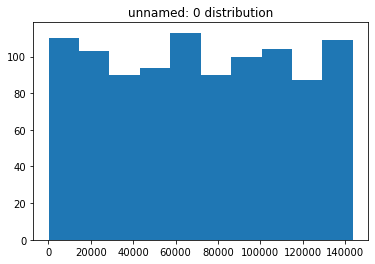

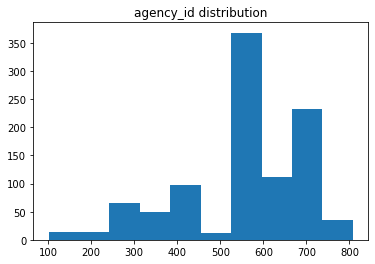

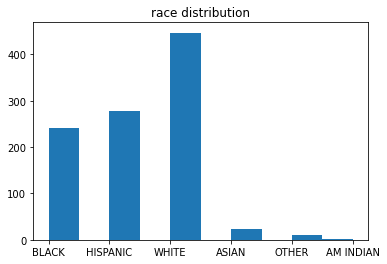

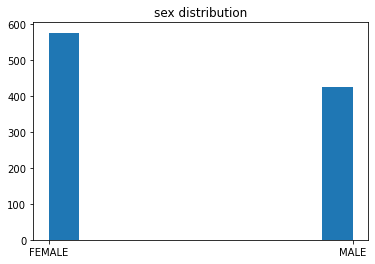

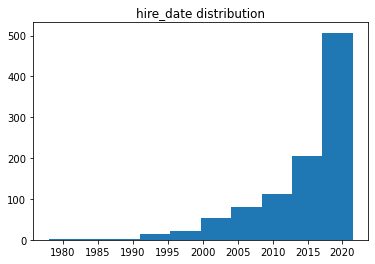

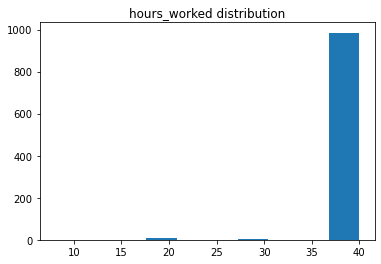

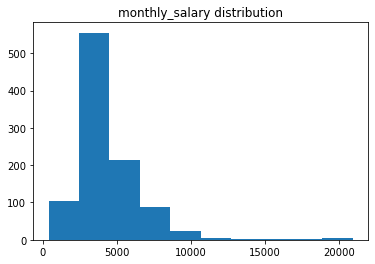

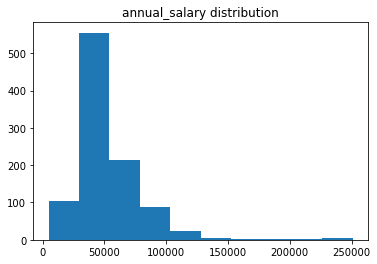

In [6]:
sample = df.drop(columns = ['emptype', 'agency', 'lastname', 'firstname', 'title']).sample(1000)

for col in sample.columns:
        plt.hist(sample[col])
        plt.title(f"{col} distribution")
        plt.show()

In [7]:
column = df.drop(columns = ['agency']).sample(1000).columns

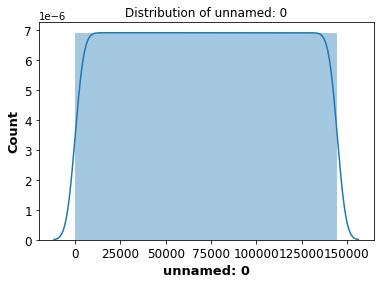

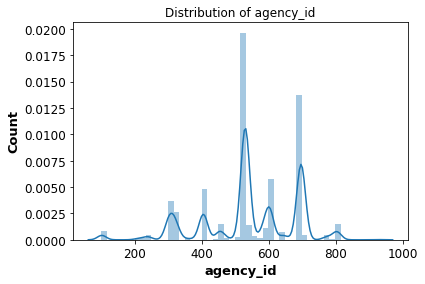

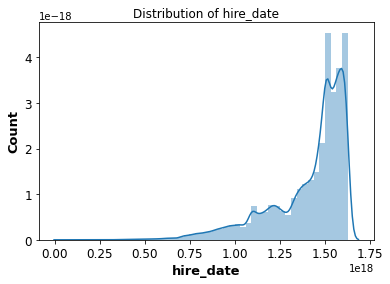

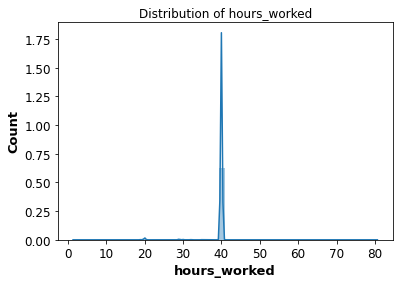

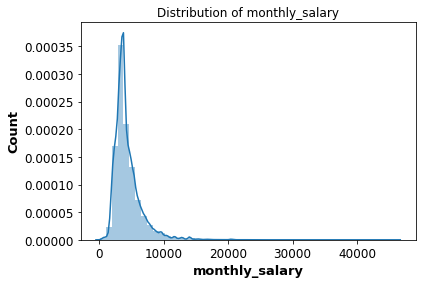

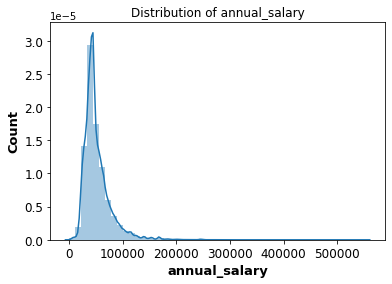

In [8]:
# sample = df.sample(1000)

for i in column:
        if df[i].dtypes != 'object':
            sns.distplot(df[i])
            plt.xticks(fontsize= 12)
            plt.yticks(fontsize=12)
            plt.ylabel("Count", fontsize= 13, fontweight="bold")
            plt.xlabel(i, fontsize=13, fontweight="bold")
            plt.title('Distribution of '+i)
            plt.show()

In [9]:
df = p.create_features(df)

In [10]:
df[df.title == 'ELECTED OFFICIAL']

,unnamed: 0,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,...,is_hispanic,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,is_director,is_unclassified,is_parttime
89,89,101,SENATE,ALVARADO,CAROL,ELECTED OFFICIAL,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2018-12-21,...,1,0,1,3,30,2.5,1,0,1,0
117,117,101,SENATE,BETTENCOURT,PAUL,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2015-01-13,...,0,0,0,5,78,6.5,1,0,1,0
121,121,101,SENATE,BIRDWELL,BRIAN,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2010-07-02,...,0,0,0,5,132,11.0,1,0,1,0
122,122,101,SENATE,BLANCO,CESAR,ELECTED OFFICIAL,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2021-01-12,...,1,0,1,3,6,0.5,1,0,1,0
144,144,101,SENATE,BUCKINGHAM,DAWN,ELECTED OFFICIAL,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2017-01-10,...,0,0,0,5,54,4.5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,102,HOUSE OF REPRESENTATIVES,WALLE,ARMANDO,ELECTED OFFICIAL,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2009-01-13,...,1,0,1,3,150,12.5,1,0,1,0
1478,1478,102,HOUSE OF REPRESENTATIVES,WHITE,JAMES,ELECTED OFFICIAL,BLACK,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2011-01-11,...,0,1,1,2,126,10.5,1,0,1,0
1498,1498,102,HOUSE OF REPRESENTATIVES,WILSON JR,TERRY,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2017-01-10,...,0,0,0,5,54,4.5,1,0,1,0
1505,1505,102,HOUSE OF REPRESENTATIVES,WU,EUGENE,ELECTED OFFICIAL,ASIAN,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2013-01-08,...,0,0,1,1,102,8.5,1,0,1,0


In [11]:
df[df.title.str.contains('ELECTED')].title.value_counts()

ELECTED OFFICIALS STAFF    597
ELECTED OFFICIAL           181
Name: title, dtype: int64

Looking At Our Maximum Age and Minimum Age to Make Some Age Bins

Max: 49.8, Min: 0.0

----------------------------

Visualizing Years of Tenure Column To Help with Binning



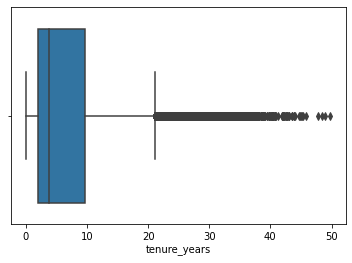


----------------------------

Looking At Our Years of Tenure Bins Value Counts
1    83017
2    27330
3    25513
4     8875
Name: tenure_years_bins, dtype: int64

----------------------------



In [12]:
df = p.make_bins_and_feats(df)

In [13]:
df[df.title.str.contains('DIRECTOR')].title.value_counts()

DIRECTOR II                       804
DIRECTOR III                      620
DIRECTOR I                        504
DIRECTOR IV                       379
DIRECTOR VI                       200
DIRECTOR V                        165
DEPUTY DIRECTOR I                  93
DIRECTOR VII                       59
EXECUTIVE DIRECTOR                 43
DEPUTY DIRECTOR II                 24
DIRECTOR                           22
ASSISTANT DIRECTOR                 18
SENIOR DIRECTOR                    18
DEPUTY DIRECTOR III                14
SENIOR MANAGING DIRECTOR            7
DEPUTY DIRECTOR IV                  5
PROGRAM DIRECTOR                    3
DEPUTY DIRECTOR                     3
REVIEW DIRECTOR                     2
COMMITTEE DIRECTOR                  2
BUDGET DIRECTOR                     1
ASST EXEC DIRECTOR                  1
DEPUTY DIRECTOR/CFO                 1
DIRECTOR OF INVESTMENTS             1
DIRECTOR, DEPARTMENT OF PUBLIC      1
DIRECTORS ASSISTANT                 1
EXECUTIVE DI

In [14]:
df[df.hours_worked==40].emptype.value_counts()

CRF - CLASSIFIED REGULAR FULL-TIME        137257
URF - UNCLASSIFIED REGULAR FULL-TIME        2545
CTF - CLASSIFIED TEMPORARY FULL-TIME        1274
ERF - EXEMPT REGULAR FULL-TIME               928
UTF - UNCLASSIFIED TEMPORARY FULL-TIME        76
Name: emptype, dtype: int64

In [15]:
df[df.hours_worked<40].annual_salary.mean(), df[df.hours_worked==40].annual_salary.mean()

(41646.609362987205, 52018.74970015637)

Salary distribution of part time versus full time


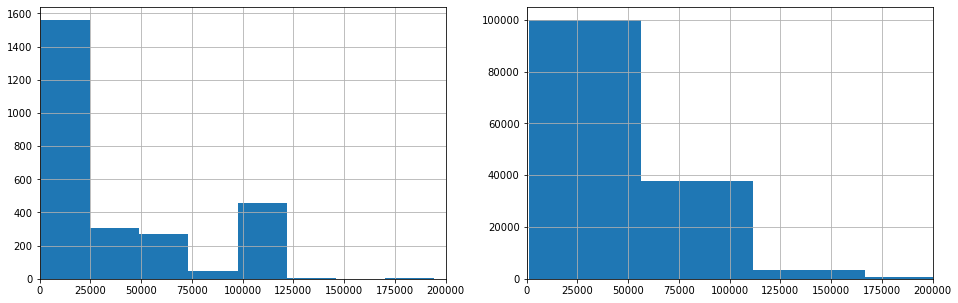

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(121)
df[df.hours_worked<40].annual_salary.hist()
plt.xlim(0,200000)
plt.subplot(122)
df[df.hours_worked==40].annual_salary.hist()
plt.xlim(0,200000)
print('Salary distribution of part time versus full time');

<AxesSubplot:>

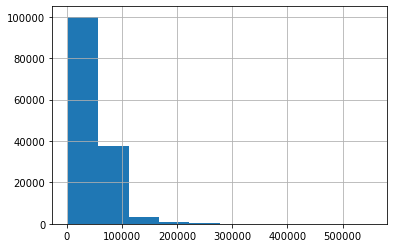

In [17]:
df[df.hours_worked==40].annual_salary.hist()

In [18]:
# split our data
train, validate, test = p.split_data(df)

Making Sure Our Shapes Look Good
Train: (81051, 30), Validate: (34737, 30), Test: (28947, 30)


## Statistics Tests
### Goals
- Comparing means of female vs male salaries
- Comparing means based on departments
- Salaries higher for newer hire dates?


**We will conduct a two sample two tailed ttest to compare the average salaries of males versus females**
\
$H_0$ = The average salary of females == The average salary of males
\
$H_a$ = The average salary of females is significantly different than the average salary of males

In [19]:
# with a 95% confidence interval, we set our alpha to 0.05
alpha = 0.05

# set up our samples
sample1 = train[train.sex=='FEMALE'].annual_salary
sample2 = train[train.sex=='MALE'].annual_salary

# now let's take a look at the variance to verify the variance between the two samples
sample1.var(), sample2.var()

(530073628.97374344, 808154613.4264593)

In [20]:
# assign t and p value
t, p = stats.ttest_ind(sample1, sample2, equal_var=False)


if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


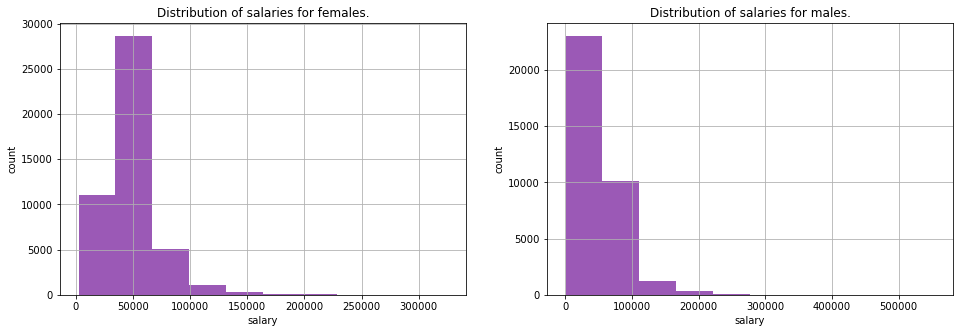

In [21]:
# take a look at salary distribution per gender
plt.figure(figsize=(16,5))
plt.subplot(121)
sample1.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for females.')
plt.subplot(122)
sample2.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for males.');

**Now will conduct a two sample one tailed ttest to compare the average salaries of elected officials versus non elected officials**
\
$H_0$ = The average salary of non elected officials == The average salary of elected officials
\
$H_a$ = The average salary of non elected officials < The average salary of elected officials

In [22]:
df.is_unclassified.value_counts()

0    141159
1      3576
Name: is_unclassified, dtype: int64

In [23]:
# set up our alpha with a confidence interval of 95%
alpha = 0.05

# set up our samples
elected = train[train.is_elected==1].annual_salary
non_elected = train[train.is_elected==0].annual_salary

# take a look at the variance
elected.var(), non_elected.var()

(7044819555.748312, 645579107.8020035)

In [24]:
# assign t and p value
t, p = stats.ttest_ind(non_elected, elected, equal_var=False)


if (p/2 < alpha) & (t < 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**This tells us that it is likely elected officials make more annually than non elected officials**

Distribution of salaries for elected official versus non elected employees.


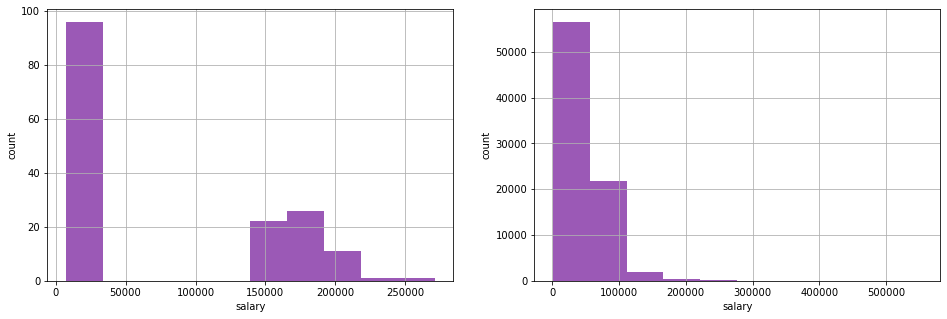

In [25]:
plt.figure(figsize=(16,5))
plt.subplot(121)
elected.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.subplot(122)
non_elected.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
print('Distribution of salaries for elected official versus non elected employees.');

**Now will conduct a two sample one tailed ttest to compare the average salaries of employees with a title that has director in it**
\
$H_0$ = The average salary of director titles == The average salary of employees without director titles
\
$H_a$ = The average salary of director titles > The average salary of employees without director titles

In [26]:
train.is_director.value_counts()

0    79311
1     1740
Name: is_director, dtype: int64

In [27]:
# set up our alpha with a confidence interval of 95%
alpha = 0.05

# set up our samples
director = train[train.is_director==1].annual_salary
non_director = train[train.is_director==0].annual_salary

# take a look at the variance
director.var(), non_director.var()

(1216771389.896126, 531346172.64564407)

In [28]:
# assign t and p value
t, p = stats.ttest_ind(non_director, director, equal_var=False)


if (p/2 < alpha) & (t < 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**Another interesting find that officials with director in their title do appear to make more than employees with non director regular titles**

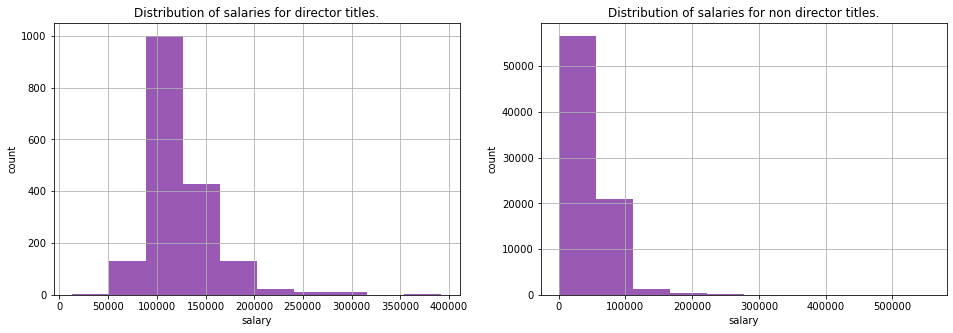

In [29]:
# take a look at salary distribution
plt.figure(figsize=(16,5))
plt.subplot(121)
director.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for director titles.')
plt.subplot(122)
non_director.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for non director titles.');

**Next we will conduct a two sample one tailed ttest to compare the average salaries of employees with classified jobs**
\
$H_0$ = The average salary of employees with unclassified jobs == The average salary of employees with classified jobs
\
$H_a$ = The average salary of employees with unclassified jobs < The average salary of employees with classified jobs

In [30]:
# set up our alpha with a confidence interval of 95%
alpha = 0.05

# set up our samples
classified = train[train.is_unclassified==0].annual_salary
unclassified = train[train.is_unclassified==1].annual_salary

classified.var(), unclassified.var()

(619100159.9690235, 1910791881.5744996)

In [31]:
# assign t and p value
t, p = stats.ttest_ind(unclassified, classified, equal_var=False)


if (p/2 < alpha) & (t < 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


**Interesting to see it does appear that employees with classified positions make the same as employees with unclassified positions**

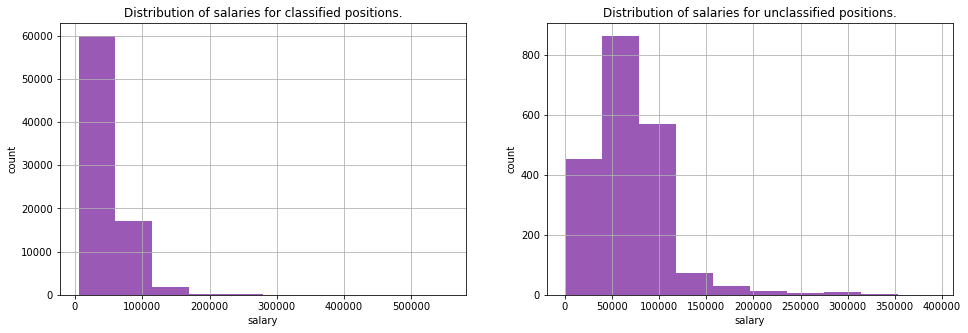

In [32]:
# take a look at salary distribution
plt.figure(figsize=(16,5))
plt.subplot(121)
classified.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for classified positions.')
plt.subplot(122)
unclassified.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for unclassified positions.');

## Ttest Takeaways:
- There is a disparity between a